In [ ]:
import pandas as pd
import numpy as np
import re
import gensim
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
from wordcloud import WordCloud
from gensim import corpora, models, similarities
import pyLDAvis
from pprint import pprint
import pickle 
import os
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from gensim.test.utils import datapath
import random
from gensim.models.ldamodel import LdaModel
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import MmCorpus
import csv
import pyLDAvis.gensim_models as gensimvis
RANDOM_STATE = 1

In [ ]:
data = pd.read_csv('dataset/DatasetLegal.csv')
# train_data = pd.read_csv('model/train_data.csv')
# test_data = pd.read_csv('model/test_data.csv')
with open("model/train_data.csv", 'r') as f:
  train_data_csv = csv.reader(f)
  train_data = [i for i in train_data_csv]
with open("model/test_data.csv", 'r') as f:
  test_data_csv = csv.reader(f)
  test_data = [i for i in test_data_csv]
with open('model/id2word.pkl', 'rb') as f:
    id2word = pickle.load(f)
corpus = []
for text in train_data:
  vec = id2word.doc2bow(text)
  corpus.append(vec)
pd.Series(corpus)
with open("lda/topic_dict_5.pkl", "rb") as f:
   topic_dict = pickle.load(f)

In [ ]:
corpus

In [5]:
with open("lda/topic_dict_5.pkl", "rb") as f:
   topic_dict = pickle.load(f)
with open("lda/lda_model_5.pkl", "rb") as f:
   lda_model = pickle.load(f)
threshold = 1/5


In [6]:
for i in range(lda_model.num_topics):
    print(f"Topic {topic_dict.get(i)}:")
    for word, prob in lda_model.show_topic(i):
        print(f"{word}: {prob:.4f}")
    print("\n")

Topic labor:
บริษัท: 0.0299
นายจ้าง: 0.0283
ลูกจ้าง: 0.0223
จ่าย: 0.0167
ทำงาน: 0.0162
สัญญา: 0.0115
สิทธิ: 0.0112
พนักงาน: 0.0098
มาตรา: 0.0098
งาน: 0.0097


Topic personal_right/court:
ศาล: 0.0232
บาท: 0.0139
เงิน: 0.0133
จำเลย: 0.0124
มาตรา: 0.0111
ฟ้อง: 0.0105
รถ: 0.0088
สัญญา: 0.0082
จ่าย: 0.0078
จำคุก: 0.0065


Topic family/succession:
ที่ดิน: 0.0300
บุตร: 0.0201
สามี: 0.0187
บ้าน: 0.0134
มาตรา: 0.0134
พ่อ: 0.0132
สิทธิ: 0.0130
แม่: 0.0124
ลูก: 0.0110
ภรรยา: 0.0090


Topic contract:
ธนาคาร: 0.0140
เจ้าหนี้: 0.0135
ชำระหนี้: 0.0119
ลูกหนี้: 0.0106
หนี้: 0.0104
บ้าน: 0.0104
เงิน: 0.0093
ฟ้อง: 0.0088
รถ: 0.0076
บาท: 0.0067


Topic criminal:
ตำรวจ: 0.0137
โดน: 0.0121
รถ: 0.0092
ศาล: 0.0087
แฟน: 0.0084
ทราบ: 0.0078
เพื่อน: 0.0072
จ่าย: 0.0061
แจ้ง: 0.0060
ซื้อ: 0.0058




<>:2: DeprecationWarning: invalid escape sequence \T
<>:2: DeprecationWarning: invalid escape sequence \T
C:\Users\User\AppData\Local\Temp\ipykernel_8888\2734724754.py:2: DeprecationWarning: invalid escape sequence \T
  font_path = 'dataset\TH_Sarabun_PSK.ttf'


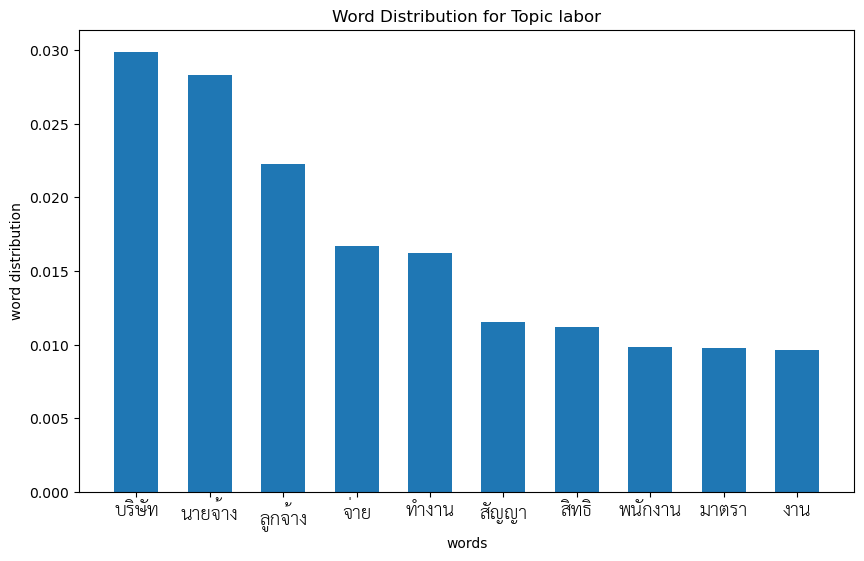

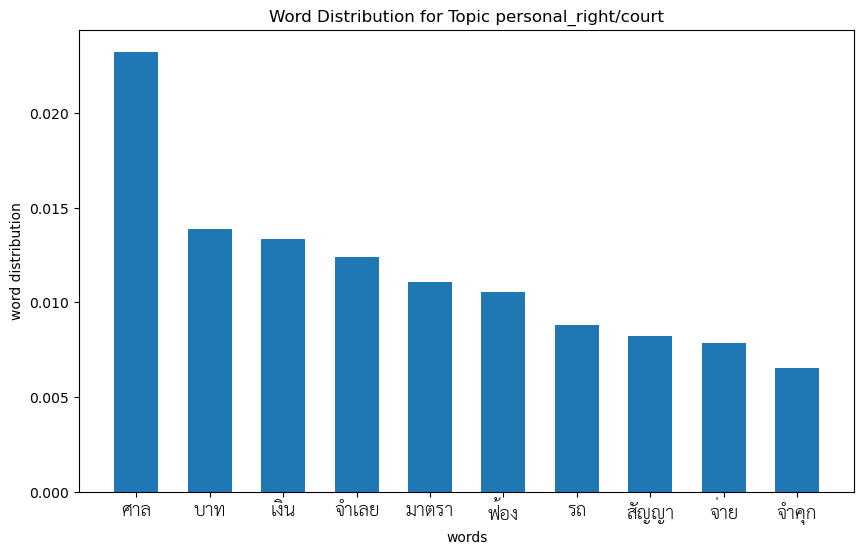

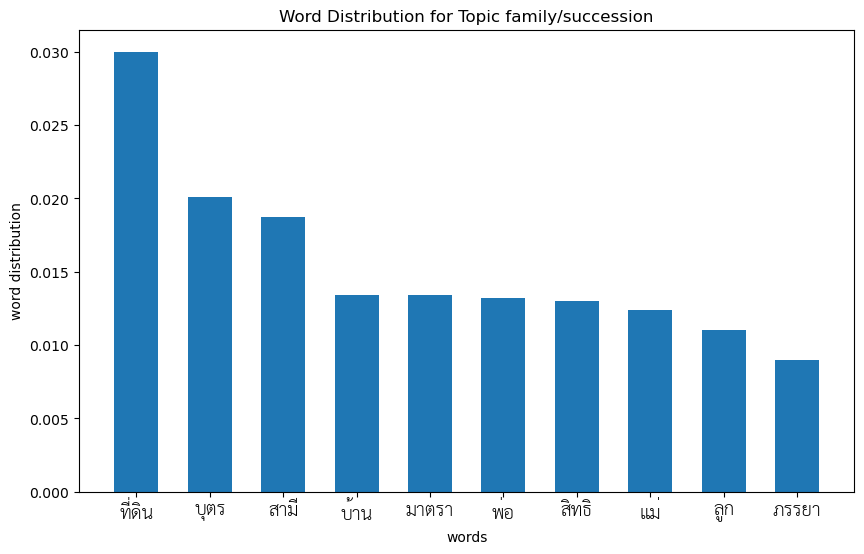

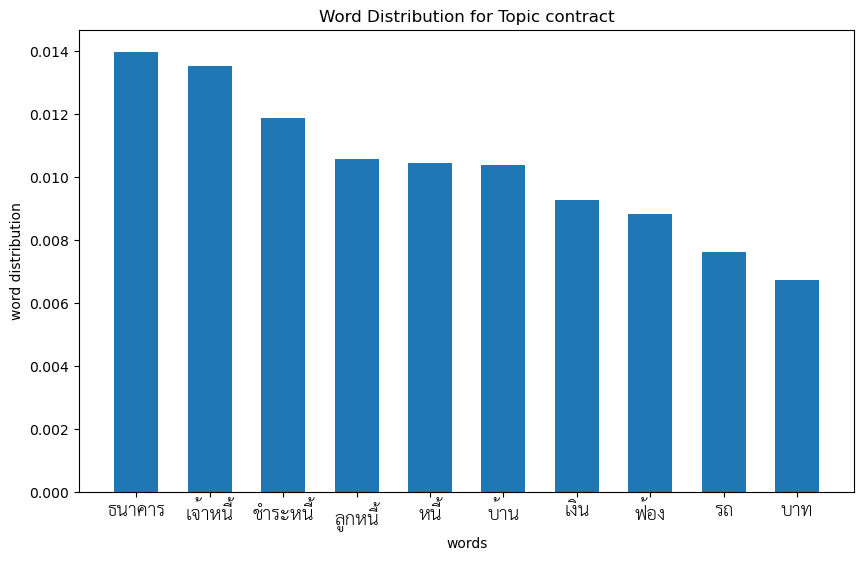

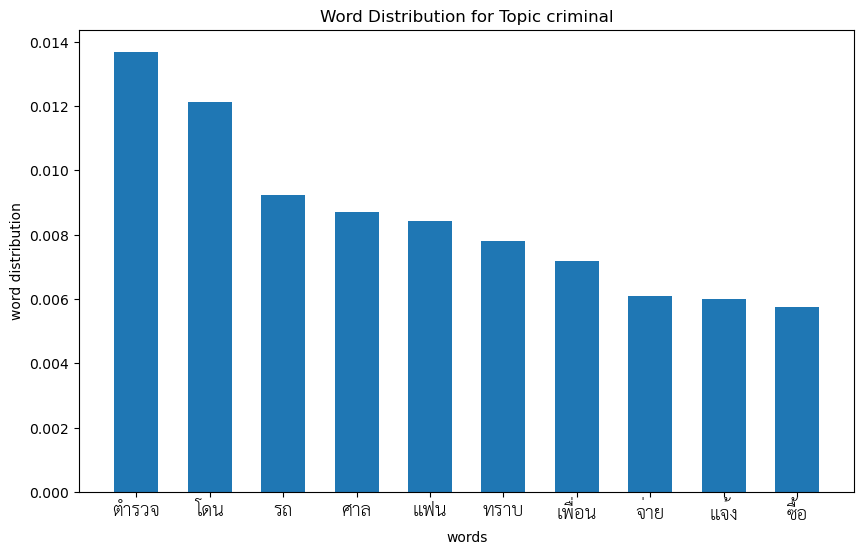

In [9]:
from matplotlib.font_manager import FontProperties
font_path = 'dataset\TH_Sarabun_PSK.ttf'
font = FontProperties(fname=font_path, size = 20)
def plotWordDist(n):
  topic_num = n
  topic_words = lda_model.show_topic(topic_num, topn=10)
  words = [word_prob[0] for word_prob in topic_words]
  probs = [word_prob[1] for word_prob in topic_words]

  fig, ax = plt.subplots(figsize=(10, 6))
  ax.bar(words, probs, width=0.6)
  ax.set_title(f"Word Distribution for Topic {topic_dict.get(topic_num)}")
  ax.set_xlabel("words")
  ax.set_ylabel("word distribution")
  plt.xticks(fontproperties=font) 
plotWordDist(0)
plotWordDist(1)
plotWordDist(2)
plotWordDist(3)
plotWordDist(4)

[(0, 0.8663493), (1, 0.00062650227), (2, 0.00063033734), (3, 0.1320101), (4, 0.0003837642)]


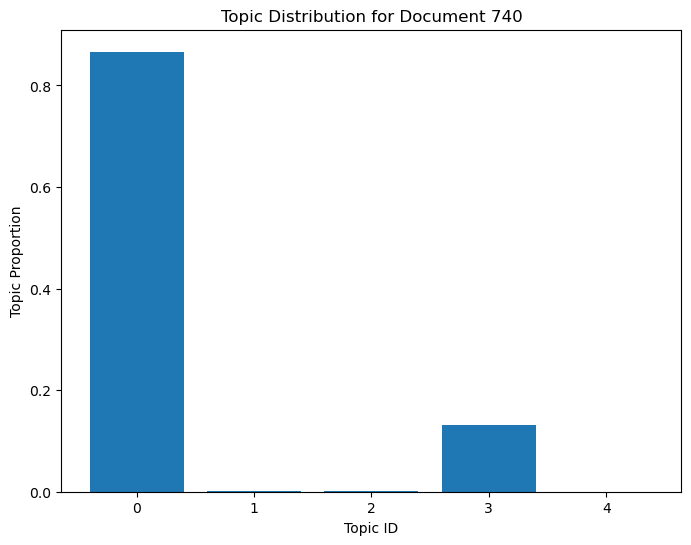

In [53]:
doc_topics = lda_model.get_document_topics(corpus[1478]) 
doc_id = np.random.randint(len(train_data)) 
doc_topics = lda_model.get_document_topics(corpus[1478]) 
print(doc_topics)
# plot the bar chart
plt.figure(figsize=(8,6))
plt.bar([t[0] for t in doc_topics], [t[1] for t in doc_topics])
plt.xlabel('Topic ID')
plt.ylabel('Topic Proportion')
plt.title(f'Topic Distribution for Document {740}')
plt.show()

In [3]:
import logging
logging.basicConfig(filename='model_callbacks.log',
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.NOTSET)

from gensim.models.callbacks import PerplexityMetric, CoherenceMetric
perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')
coherence_cv_logger = CoherenceMetric(corpus=corpus, logger='shell', coherence = 'c_v', texts = train_data)

In [4]:
data = pd.read_csv('dataset/DatasetLegal.csv')
str_answer = data['answer'].astype(str)
str_answer = str_answer.map(lambda x: re.sub('[,.!?*#/]', '', x))
str_question = data['question'].astype(str)
str_question = str_question.map(lambda x: re.sub('[,.!?*#/]', '', x))
data

,question,answer,Classes
0,!ดิฉันมีเรื่องปรึกษาเกี่ยวกับคดีครอบครัวคือว่า...,ดอกเบี้ยของเงินฝากสินส่วนตัวของภริยาย่อมเป็นดอ...,family
1,#บิดาดิฉันมีลูกติดคนมารดามีลูกติดคน#บิดามารดาส...,คุณสามารถร้องขอเป็นผู้จัดการมรดกของบิดาได้ส่วน...,family
2,#เรื่องการ้ยืมมีคนมายืมเงินได้เขียนสัญญา้้ยืมแ...,เช็คลงวันที่ไม่ตรงกับวันครบกำหนดสัญญา้จะฟ้องร้...,contract
3,๑ผมเป็นบุตรพ่อตามกฎหมาย๒พ่อมีน้อง๑คนยังมีชีวิต...,คุณมีทางเลือกอยู่ประการประการแรกยื่นคำร้องเพื่...,family
4,๑มีคดีบัตรเครดิตตั้งแต่ยุคฟองสบู่แตกประมาณ๑๓ใบ...,คดีที่มีการฟ้องร้องแล้วและศาลอ่านคำพิพากษาเกิน...,contract
...,...,...,...
7026,เอาใบที่ดินไปกู้เงินแล้วเซ็นโอนลอยใว้เขาจะโอนเ...,ถ้ากู้เงินแล้วไม่สามารถใช้หนี้ได้ตามกำหนดและข้...,contract
7027,เอารถไปจำนำทะเบียนรถแต่รถไม่ได้โอนเป็นของไฟแนล...,การจำนำการเช่าซื่อโอนลอยการจำนำผู้จำนำต้องส่งม...,contract
7028,แอบทำงานที่อเมริกาโดยใช้วีซ่านักศึกษาโดนจับขึ้...,การที่ท่านถูกดำเนินคดีนอกราชอาณาจักรแล้วถูกส่ง...,criminal
7029,แอบอัดเสียงใช้เป็นหลักฐานในคดีได้โอเคไหม,พยานหลักฐานการแอบบันทึกเสียงคงใช้เป็นพยานหลักฐ...,criminal


In [5]:
sentense_token = []
for i in range(len(str_answer)):
  sentense_token.append(str_question[i])
  sentense_token.append(str_answer[i])
word_token_data = []
for sentense in sentense_token:
  words = word_tokenize(sentense, engine='newmm')
  word_token_data.append(words)

In [6]:
stopwords = list(thai_stopwords())
read_stopwords = pd.read_csv('dataset/add_stopwords.csv')
add_stopwords = read_stopwords['stopword'].values.tolist()
processed_data = []
for sentense in word_token_data:
  each_sentense = []
  for word in sentense:
    if(word not in stopwords + add_stopwords):
      each_sentense.append(word)
  processed_data.append(each_sentense)

In [7]:
train_data = processed_data[:11250] # 5625 document 80% of all data
test_data = processed_data[11250:] # 1406 document 20% of all data
with open('model/train_data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(train_data)
with open('model/test_data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(test_data)
train_data

[['มีเรื่อง',
  'ปรึกษา',
  'ครอบครัว',
  'สินสมรส',
  'สินส่วนตัว',
  'การทราบ',
  'ข้อเท็จจริง',
  'วิธีการ',
  'ปฎิบัติ',
  'ดังนี้',
  'เงินเก็บ',
  'สมรส',
  'ล้าน',
  'บาท',
  'สินส่วนตัว',
  'สมรส',
  'ดอกเบี้ย',
  'เงินฝาก',
  'สินสมรส',
  'ข้อตกลง',
  'สัญา',
  'สลักหลัง',
  'ทะเบียนสมรส',
  'ดอกเบี้ย',
  'เกิดขึ้น',
  'สมรส',
  'สินส่วนตัว',
  'เพียงผู้เดียว',
  'ทำได้',
  'สามี',
  'ยินยอม',
  'เซ็นต์',
  'ต่อมา',
  'สามี',
  'บอกเลิก',
  'ล้าง',
  'สมรส',
  'แม่บ้าน',
  'รายได้',
  'สามี',
  'รายได้',
  'บาท',
  'อ้าง',
  'สิทธิ',
  'สินสมรส',
  'แบ่ง',
  'สามี',
  'คนละ',
  'ครึ่ง',
  'สามี',
  'ดำเนิน',
  'การร้องขอ',
  'ศาล',
  'กฎหมาย',
  'มาตรา',
  'เปิดช่อง',
  'ทำได้',
  'รบกวน',
  'เลข',
  'ตรากฎหมาย',
  'อ้างอิง',
  'ศึกษา',
  'ขอโทษ',
  'เห็นแก่ตัว',
  'สามี',
  'เงิน',
  'หญิง'],
 ['ดอกเบี้ย',
  'เงินฝาก',
  'สินส่วนตัว',
  'ภริยา',
  'ดอกผลนิตินัย',
  'สินส่วนตัว',
  'ดอกเบี้ย',
  'สินสมรส',
  'ปพพ',
  'มาตรา',
  'ประสงค์',
  'ข้อตกลง',
  'แจ้ง',
  'ทะเบียนสมรส'

In [8]:
id2word = corpora.Dictionary(train_data)
# id2word.filter_extremes(no_below=20, no_above=0.5)
# print(id2word)
with open('model/id2word.pkl', 'wb') as f:
    pickle.dump(id2word, f)

In [2]:
# import pickle
# with open('model/id2word.pkl', 'rb') as f:
#     id2word = pickle.load(f)
# id2word

In [9]:
corpus = []
for text in train_data:
  vec = id2word.doc2bow(text)
  corpus.append(vec)
pd.Series(corpus)

0        [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...
1        [(0, 1), (4, 1), (9, 4), (14, 1), (15, 2), (20...
2        [(57, 1), (84, 1), (85, 1), (86, 1), (87, 2), ...
3        [(5, 1), (49, 3), (66, 1), (84, 1), (92, 1), (...
4        [(6, 1), (9, 1), (11, 2), (13, 1), (22, 1), (4...
                               ...                        
11245    [(5, 1), (28, 2), (40, 1), (41, 1), (116, 1), ...
11246    [(7, 1), (23, 1), (51, 1), (57, 1), (75, 1), (...
11247    [(33, 2), (82, 1), (125, 2), (192, 1), (200, 1...
11248    [(56, 1), (81, 1), (116, 1), (121, 1), (176, 1...
11249    [(16, 1), (20, 2), (28, 1), (34, 2), (44, 2), ...
Length: 11250, dtype: object

In [4]:
num_topics = 4
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            iterations=1000, # number of iterations performed within each pass
                                            chunksize=len(corpus),
                                            passes=10, # number of times the model goes through the entire training corpus
                                            alpha='auto', # how sparse of topic distribution
                                            eta='auto', # how sparse of word distribution
                                            random_state=RANDOM_STATE, 
                                            update_every=0, # frequency of parameter updates during training.
                                            minimum_probability=0, 
                                            eval_every=1,
                                            # callbacks=[perplexity_logger, coherence_cv_logger]
                                            )
with open('lda/lda_model_4.pkl', 'wb') as f:
    pickle.dump(lda_model, f)
lda_model.show_topics(num_topics=num_topics, num_words=6)

[(0,
  '0.030*"บริษัท" + 0.026*"นายจ้าง" + 0.021*"ลูกจ้าง" + 0.017*"จ่าย" + 0.016*"ทำงาน" + 0.011*"สัญญา"'),
 (1,
  '0.021*"ศาล" + 0.012*"บาท" + 0.012*"เงิน" + 0.010*"จำเลย" + 0.010*"ฟ้อง" + 0.009*"รถ"'),
 (2,
  '0.029*"ที่ดิน" + 0.019*"บุตร" + 0.018*"สามี" + 0.013*"บ้าน" + 0.013*"มาตรา" + 0.013*"พ่อ"'),
 (3,
  '0.011*"โดน" + 0.009*"เจ้าหนี้" + 0.009*"ธนาคาร" + 0.009*"รถ" + 0.008*"แฟน" + 0.008*"ลูกหนี้"')]

In [5]:
topic_dict = {
    0 : "labor",
    1 : "personal rights/court",
    2 : "family/succession",
    3 : "contract",
}

with open('lda/topic_dict_4.pkl', 'wb') as f:
    pickle.dump(topic_dict, f)

In [54]:
num_topics = 5
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            iterations=1000, # number of iterations performed within each pass
                                            chunksize=len(corpus),
                                            passes=10, # number of times the model goes through the entire training corpus
                                            alpha='auto', # how sparse of topic distribution
                                            eta='auto', # how sparse of word distribution
                                            random_state=RANDOM_STATE, 
                                            update_every=0, # frequency of parameter updates during training.
                                            minimum_probability=0, 
                                            eval_every=1,
                                            callbacks=[perplexity_logger, coherence_cv_logger]
                                            )
with open('model/lda_model.pkl', 'wb') as f:
    pickle.dump(lda_model, f)
lda_model.show_topics(num_topics=num_topics, num_words=6)

[(0,
  '0.030*"บริษัท" + 0.028*"นายจ้าง" + 0.022*"ลูกจ้าง" + 0.017*"จ่าย" + 0.016*"ทำงาน" + 0.012*"สัญญา"'),
 (1,
  '0.023*"ศาล" + 0.014*"บาท" + 0.013*"เงิน" + 0.012*"จำเลย" + 0.011*"มาตรา" + 0.011*"ฟ้อง"'),
 (2,
  '0.030*"ที่ดิน" + 0.020*"บุตร" + 0.019*"สามี" + 0.013*"บ้าน" + 0.013*"มาตรา" + 0.013*"พ่อ"'),
 (3,
  '0.014*"ธนาคาร" + 0.014*"เจ้าหนี้" + 0.012*"ชำระหนี้" + 0.011*"ลูกหนี้" + 0.010*"หนี้" + 0.010*"บ้าน"'),
 (4,
  '0.014*"ตำรวจ" + 0.012*"โดน" + 0.009*"รถ" + 0.009*"ศาล" + 0.008*"แฟน" + 0.008*"ทราบ"')]

In [ ]:
lda_model.show_topics(num_topics=num_topics, num_words=20)

In [ ]:
for i in range(lda_model.num_topics):
    print(f"Topic {topic_dict.get(i)}:")
    for word, prob in lda_model.show_topic(i):
        print(f"{word}: {prob:.4f}")
    print("\n")

In [2]:
topic_dict = {
    0 : "labor",
    1 : "personal rights/court",
    2 : "family/succession",
    3 : "contract",
    4 : "criminal",
}

with open('model/topic_dict.pkl', 'wb') as f:
    pickle.dump(topic_dict, f)

In [10]:
lda_model.log_perplexity(corpus)

-7.240857795521262

In [11]:
lda_model.log_perplexity(corpus)
coherence_lda = CoherenceModel(model=lda_model, corpus=corpus, texts=test_data, dictionary=id2word, coherence='c_v')
print(coherence_lda.get_coherence_per_topic())
coherence_lda.get_coherence()

[0.6902106667352188, 0.3002604063798093, 0.5651976364474212, 0.5182573821129128, 0.424610467420778]


0.499707311819228

In [21]:
lda_model.get_document_topics(corpus[33])

[(0, 0.0021656551),
 (1, 0.0020896585),
 (2, 0.0011915067),
 (3, 0.28720552),
 (4, 0.0015049616),
 (5, 0.70584273)]

In [6]:
lda_model.alpha

array([0.06184261, 0.06974824, 0.07769059, 0.05495739, 0.04842547,
       0.041978  ], dtype=float32)

In [7]:
lda_model.eta

array([8.965644  , 0.4998627 , 0.2424116 , ..., 0.12762997, 0.1276299 ,
       0.12763008], dtype=float32)

In [ ]:
lda_model.show_topics(num_topics=num_topics, num_words=10)

In [12]:
with open('model/id2word.pkl', 'rb') as f:
  id2word = pickle.load(f)
with open('model/lda_model.pkl', 'rb') as f:
  lda_model = pickle.load(f)
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('model/ldavis_prepared_'+str(num_topics))

LDAvis_data_filepath
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'model/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

c:\Users\User\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.221685  0.014742       1        1  26.917090
1      0.037254 -0.051659       2        1  23.006383
0      0.075454  0.175270       3        1  20.016065
3      0.018121 -0.062389       4        1  16.765185
4      0.090856 -0.075964       5        1  13.295278, topic_info=        Term         Freq        Total Category  logprob  loglift
651  นายจ้าง  3173.000000  3173.000000  Default  30.0000  30.0000
232   ที่ดิน  4682.000000  4682.000000  Default  29.0000  29.0000
653  ลูกจ้าง  2505.000000  2505.000000  Default  28.0000  28.0000
93      บุตร  3037.000000  3037.000000  Default  27.0000  27.0000
391   บริษัท  4159.000000  4159.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
17       บาท   313.776602  3147.065993   Topic5  -5.4608  -0.2878
804      คืน   282.218821  1703.245869   Topic5  -5.5667   0.2202
448     บ้าน   280.447353  3947.249414   Topic5  -5.5730  -0.6266
109   เอกสาร   260.500352  1396.270452   Topic5  -5.6468   0.3388
335       รอ   252.700922  1031.399459   Topic5  -5.6772   0.6113

[407 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.297985  กฎหมาย
0         2  0.270095  กฎหมาย
0         3  0.322939  กฎหมาย
0         4  0.052845  กฎหมาย
0         5  0.056514  กฎหมาย
...     ...       ...     ...
6166      4  0.940719    ไฮโซ
3309      3  0.964047     ๑๑๘
3310      3  0.980369    ๒๕๔๑
3310      5  0.021312    ๒๕๔๑
1120      4  0.938882     ๖๘๐

[1174 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4, 5])

In [5]:
with open('model/id2word.pkl', 'rb') as f:
  id2word = pickle.load(f)
with open('lda/lda_model_4.pkl', 'rb') as f:
  lda_model = pickle.load(f)
pyLDAvis.enable_notebook()
num_topics = 4
LDAvis_data_filepath = os.path.join('model/ldavis_prepared_'+str(num_topics))

LDAvis_data_filepath
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'model/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

c:\Users\User\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.044463  0.078121       1        1  28.982191
2     -0.197722 -0.038460       2        1  28.201536
3      0.042526  0.098027       3        1  21.451497
0      0.110733 -0.137688       4        1  21.364776, topic_info=        Term         Freq        Total Category  logprob  loglift
232   ที่ดิน  4649.000000  4649.000000  Default  30.0000  30.0000
651  นายจ้าง  3126.000000  3126.000000  Default  29.0000  29.0000
391   บริษัท  4099.000000  4099.000000  Default  28.0000  28.0000
653  ลูกจ้าง  2468.000000  2468.000000  Default  27.0000  27.0000
93      บุตร  3017.000000  3017.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
20     มาตรา  1088.897261  4802.101634   Topic4  -4.6908   0.0595
147      ค่า   555.822695  1753.373385   Topic4  -5.3633   0.3946
262     ทราบ   490.924677  2593.970216   Topic4  -5.4875  -0.1212
164     ฟ้อง   504.413386  3716.898826   Topic4  -5.4604  -0.4538
0     กฎหมาย   438.350518  1357.953662   Topic4  -5.6007   0.4127

[321 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.309289  กฎหมาย
0         2  0.307080  กฎหมาย
0         3  0.060385  กฎหมาย
0         4  0.322544  กฎหมาย
427       1  0.260322    กรณี
...     ...       ...     ...
4121      3  0.902368    ไอซ์
4121      4  0.007986    ไอซ์
3309      4  0.978054     ๑๑๘
3310      4  0.973233    ๒๕๔๑
1120      3  0.942079     ๖๘๐

[833 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

In [17]:
num_topics = 5
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            iterations=1000, # number of iterations performed within each pass
                                            chunksize=len(corpus),
                                            passes=10, # number of times the model goes through the entire training corpus
                                            alpha='auto', # how sparse of topic distribution
                                            eta='auto', # how sparse of word distribution
                                            random_state=RANDOM_STATE, 
                                            update_every=0, # frequency of parameter updates during training.
                                            minimum_probability=0, 
                                            eval_every=1,
                                            callbacks=[perplexity_logger, coherence_cv_logger]
                                            )
with open(f'lda/lda_model_{num_topics}.pkl', 'wb') as f:
    pickle.dump(lda_model, f)
lda_model.show_topics(num_topics=num_topics, num_words=20)

[(0,
  '0.030*"บริษัท" + 0.028*"นายจ้าง" + 0.022*"ลูกจ้าง" + 0.017*"จ่าย" + 0.016*"ทำงาน" + 0.012*"สัญญา" + 0.011*"สิทธิ" + 0.010*"พนักงาน" + 0.010*"มาตรา" + 0.010*"งาน" + 0.010*"เลิกจ้าง" + 0.009*"เงิน" + 0.008*"แจ้ง" + 0.008*"กรณี" + 0.008*"ค่าจ้าง" + 0.007*"วันที่" + 0.006*"คุ้มครอง" + 0.006*"แรงงาน" + 0.006*"ค่าชดเชย" + 0.005*"การทำงาน"'),
 (1,
  '0.023*"ศาล" + 0.014*"บาท" + 0.013*"เงิน" + 0.012*"จำเลย" + 0.011*"มาตรา" + 0.011*"ฟ้อง" + 0.009*"รถ" + 0.008*"สัญญา" + 0.008*"จ่าย" + 0.007*"จำคุก" + 0.006*"เช่าซื้อ" + 0.006*"ความผิด" + 0.006*"คืน" + 0.006*"เช็ค" + 0.005*"ค่า" + 0.005*"บ้าน" + 0.005*"จำนวน" + 0.005*"โจทก์" + 0.005*"กรณี" + 0.005*"สิทธิ"'),
 (2,
  '0.030*"ที่ดิน" + 0.020*"บุตร" + 0.019*"สามี" + 0.013*"บ้าน" + 0.013*"มาตรา" + 0.013*"พ่อ" + 0.013*"สิทธิ" + 0.012*"แม่" + 0.011*"ลูก" + 0.009*"ภรรยา" + 0.009*"โอน" + 0.008*"บิดา" + 0.008*"ปพพ" + 0.008*"แบ่ง" + 0.008*"มรดก" + 0.008*"จดทะเบียน" + 0.008*"ผู้จัดการมรดก" + 0.007*"ทรัพย์สิน" + 0.007*"ศาล" + 0.007*"ทายาท"'),
 (3,
  '0

In [17]:
topic_dict = {
    0 : "labor",
    1 : "personal_rights/court",
    2 : "family/succession",
    3 : "contract",
    4 : "criminal"
}
num_topics = len(topic_dict)
with open(f'lda/topic_dict_{num_topics}.pkl', 'wb') as f:
    pickle.dump(topic_dict, f)

In [18]:
num_topics = 6
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            iterations=1000, # number of iterations performed within each pass
                                            chunksize=len(corpus),
                                            passes=10, # number of times the model goes through the entire training corpus
                                            alpha='auto', # how sparse of topic distribution
                                            eta='auto', # how sparse of word distribution
                                            random_state=RANDOM_STATE, 
                                            update_every=0, # frequency of parameter updates during training.
                                            minimum_probability=0, 
                                            eval_every=1,
                                            callbacks=[perplexity_logger, coherence_cv_logger]
                                            )
with open(f'lda/lda_model_{num_topics}.pkl', 'wb') as f:
    pickle.dump(lda_model, f)
lda_model.show_topics(num_topics=num_topics, num_words=20)

[(0,
  '0.035*"บริษัท" + 0.018*"จ่าย" + 0.016*"เงิน" + 0.014*"ทำงาน" + 0.011*"สัญญา" + 0.011*"แจ้ง" + 0.010*"พนักงาน" + 0.009*"วันที่" + 0.008*"งาน" + 0.007*"นายจ้าง" + 0.007*"รถ" + 0.007*"บาท" + 0.006*"ค่า" + 0.006*"เงินเดือน" + 0.006*"เอกสาร" + 0.006*"ทราบ" + 0.005*"ฟ้อง" + 0.005*"โอน" + 0.004*"หัก" + 0.004*"ลาออก"'),
 (1,
  '0.029*"ศาล" + 0.016*"จำเลย" + 0.014*"บาท" + 0.010*"เงิน" + 0.010*"มาตรา" + 0.010*"ฟ้อง" + 0.009*"จำคุก" + 0.007*"ความผิด" + 0.007*"เช็ค" + 0.006*"จ่าย" + 0.006*"โจทก์" + 0.006*"กระทำความผิด" + 0.006*"ทนาย" + 0.006*"รถ" + 0.005*"ยื่น" + 0.005*"คำพิพากษา" + 0.005*"ลงโทษ" + 0.005*"อุทธรณ์" + 0.005*"รอ" + 0.005*"บ้าน"'),
 (2,
  '0.031*"ที่ดิน" + 0.021*"บุตร" + 0.020*"สามี" + 0.014*"บ้าน" + 0.014*"พ่อ" + 0.013*"แม่" + 0.013*"สิทธิ" + 0.013*"มาตรา" + 0.012*"ลูก" + 0.009*"ภรรยา" + 0.009*"โอน" + 0.009*"บิดา" + 0.009*"แบ่ง" + 0.008*"ปพพ" + 0.008*"มรดก" + 0.008*"ผู้จัดการมรดก" + 0.008*"จดทะเบียน" + 0.008*"ทรัพย์สิน" + 0.007*"ศาล" + 0.007*"ทายาท"'),
 (3,
  '0.017*"ธนาคาร" 

In [18]:
topic_dict = {
    0 : "labor",
    1 : "personal_rights/court",
    2 : "family/succession",
    3 : "contract",
    4 : "criminal",
    5 : "labor"
}

num_topics = len(topic_dict)
with open(f'lda/topic_dict_{num_topics}.pkl', 'wb') as f:
    pickle.dump(topic_dict, f)

In [19]:
num_topics = 7
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            iterations=1000, # number of iterations performed within each pass
                                            chunksize=len(corpus),
                                            passes=10, # number of times the model goes through the entire training corpus
                                            alpha='auto', # how sparse of topic distribution
                                            eta='auto', # how sparse of word distribution
                                            random_state=RANDOM_STATE, 
                                            update_every=0, # frequency of parameter updates during training.
                                            minimum_probability=0, 
                                            eval_every=1,
                                            callbacks=[perplexity_logger, coherence_cv_logger]
                                            )
with open(f'lda/lda_model_{num_topics}.pkl', 'wb') as f:
    pickle.dump(lda_model, f)
lda_model.show_topics(num_topics=num_topics, num_words=20)

[(0,
  '0.032*"บริษัท" + 0.020*"เงิน" + 0.018*"จ่าย" + 0.015*"รถ" + 0.012*"สัญญา" + 0.011*"แจ้ง" + 0.011*"ทำงาน" + 0.010*"บาท" + 0.009*"วันที่" + 0.008*"พนักงาน" + 0.008*"ค่า" + 0.007*"งาน" + 0.007*"เอกสาร" + 0.007*"ทราบ" + 0.006*"โอน" + 0.006*"คืน" + 0.006*"ขาย" + 0.006*"ฟ้อง" + 0.005*"เงินเดือน" + 0.005*"จำนวน"'),
 (1,
  '0.034*"ศาล" + 0.019*"จำเลย" + 0.013*"บาท" + 0.012*"มาตรา" + 0.011*"จำคุก" + 0.009*"ความผิด" + 0.009*"ฟ้อง" + 0.008*"เช็ค" + 0.008*"กระทำความผิด" + 0.007*"โจทก์" + 0.007*"เงิน" + 0.006*"ยื่น" + 0.006*"คำพิพากษา" + 0.006*"ลงโทษ" + 0.006*"อุทธรณ์" + 0.006*"ทนาย" + 0.006*"รอ" + 0.006*"ฐาน" + 0.005*"โทษ" + 0.005*"กรณี"'),
 (2,
  '0.030*"ที่ดิน" + 0.022*"บุตร" + 0.021*"สามี" + 0.015*"บ้าน" + 0.014*"พ่อ" + 0.014*"แม่" + 0.013*"ลูก" + 0.013*"สิทธิ" + 0.012*"มาตรา" + 0.010*"ภรรยา" + 0.009*"บิดา" + 0.009*"แบ่ง" + 0.009*"โอน" + 0.008*"มรดก" + 0.008*"จดทะเบียน" + 0.008*"ทรัพย์สิน" + 0.008*"ปพพ" + 0.008*"ผู้จัดการมรดก" + 0.007*"เด็ก" + 0.007*"ทายาท"'),
 (3,
  '0.023*"ธนาคาร" + 0

In [19]:
topic_dict = {
    0 : "labor",
    1 : "personal_rights/court",
    2 : "family/succession",
    3 : "contract",
    4 : "criminal",
    5 : "contract",
    6 : "labor"
}

num_topics = len(topic_dict)
with open(f'lda/topic_dict_{num_topics}.pkl', 'wb') as f:
    pickle.dump(topic_dict, f)

In [5]:
num_topics = 8
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            iterations=1000, # number of iterations performed within each pass
                                            chunksize=len(corpus),
                                            passes=10, # number of times the model goes through the entire training corpus
                                            alpha='auto', # how sparse of topic distribution
                                            eta='auto', # how sparse of word distribution
                                            random_state=RANDOM_STATE, 
                                            update_every=0, # frequency of parameter updates during training.
                                            minimum_probability=0, 
                                            eval_every=1,
                                            callbacks=[perplexity_logger, coherence_cv_logger]
                                            )
with open(f'lda/lda_model_{num_topics}.pkl', 'wb') as f:
    pickle.dump(lda_model, f)
lda_model.show_topics(num_topics=num_topics, num_words=20)

[(0,
  '0.029*"บริษัท" + 0.023*"เงิน" + 0.019*"รถ" + 0.018*"จ่าย" + 0.014*"สัญญา" + 0.011*"บาท" + 0.010*"แจ้ง" + 0.009*"คืน" + 0.008*"ค่า" + 0.008*"โอน" + 0.008*"เอกสาร" + 0.008*"ขาย" + 0.007*"วันที่" + 0.007*"ทราบ" + 0.007*"ฟ้อง" + 0.007*"เพื่อน" + 0.006*"จำนวน" + 0.006*"ทำงาน" + 0.005*"ซื้อ" + 0.005*"งวด"'),
 (1,
  '0.035*"ศาล" + 0.021*"จำเลย" + 0.013*"บาท" + 0.013*"มาตรา" + 0.010*"จำคุก" + 0.010*"ฟ้อง" + 0.009*"ความผิด" + 0.009*"เช็ค" + 0.008*"โจทก์" + 0.008*"กระทำความผิด" + 0.008*"เงิน" + 0.007*"คำพิพากษา" + 0.007*"ยื่น" + 0.007*"อุทธรณ์" + 0.006*"ลงโทษ" + 0.006*"ฐาน" + 0.005*"ทนาย" + 0.005*"รอ" + 0.005*"บ้าน" + 0.005*"กรณี"'),
 (2,
  '0.031*"ที่ดิน" + 0.022*"บุตร" + 0.021*"สามี" + 0.015*"พ่อ" + 0.014*"บ้าน" + 0.014*"แม่" + 0.013*"สิทธิ" + 0.013*"ลูก" + 0.012*"มาตรา" + 0.010*"ภรรยา" + 0.009*"บิดา" + 0.009*"แบ่ง" + 0.009*"โอน" + 0.008*"มรดก" + 0.008*"ผู้จัดการมรดก" + 0.008*"จดทะเบียน" + 0.008*"ปพพ" + 0.008*"ทรัพย์สิน" + 0.007*"เด็ก" + 0.007*"ทายาท"'),
 (3,
  '0.021*"ธนาคาร" + 0.018*

In [20]:
topic_dict = {
    0 : "contract",
    1 : "personal_rights/court",
    2 : "family/succession",
    3 : "contract",
    4 : "criminal",
    5 : "contract",
    6 : "labor",
    7 : "labor"
}

num_topics = len(topic_dict)
with open(f'lda/topic_dict_{num_topics}.pkl', 'wb') as f:
    pickle.dump(topic_dict, f)

In [20]:
num_topics = 9
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            iterations=1000, # number of iterations performed within each pass
                                            chunksize=len(corpus),
                                            passes=10, # number of times the model goes through the entire training corpus
                                            alpha='auto', # how sparse of topic distribution
                                            eta='auto', # how sparse of word distribution
                                            random_state=RANDOM_STATE, 
                                            update_every=0, # frequency of parameter updates during training.
                                            minimum_probability=0, 
                                            eval_every=1,
                                            callbacks=[perplexity_logger, coherence_cv_logger]
                                            )
with open(f'lda/lda_model_{num_topics}.pkl', 'wb') as f:
    pickle.dump(lda_model, f)
lda_model.show_topics(num_topics=num_topics, num_words=20)

[(0,
  '0.025*"รถ" + 0.024*"เงิน" + 0.016*"จ่าย" + 0.014*"บริษัท" + 0.013*"บาท" + 0.011*"สัญญา" + 0.011*"คืน" + 0.010*"โอน" + 0.009*"ขาย" + 0.009*"เพื่อน" + 0.008*"แจ้ง" + 0.008*"ฟ้อง" + 0.008*"ซื้อ" + 0.008*"เอกสาร" + 0.007*"ชื่อ" + 0.007*"ทราบ" + 0.007*"ค่า" + 0.006*"จำนวน" + 0.006*"งวด" + 0.006*"กู้"'),
 (1,
  '0.034*"ศาล" + 0.024*"จำเลย" + 0.015*"มาตรา" + 0.012*"บาท" + 0.011*"จำคุก" + 0.011*"ความผิด" + 0.010*"เช็ค" + 0.009*"โจทก์" + 0.009*"กระทำความผิด" + 0.008*"ฟ้อง" + 0.008*"อุทธรณ์" + 0.008*"คำพิพากษา" + 0.007*"ลงโทษ" + 0.007*"ยื่น" + 0.006*"ฐาน" + 0.006*"เงิน" + 0.005*"รอ" + 0.005*"พิจารณา" + 0.005*"กรณี" + 0.005*"ทนาย"'),
 (2,
  '0.034*"ที่ดิน" + 0.024*"บุตร" + 0.018*"สามี" + 0.017*"พ่อ" + 0.016*"บ้าน" + 0.016*"แม่" + 0.015*"ลูก" + 0.013*"สิทธิ" + 0.011*"ภรรยา" + 0.010*"บิดา" + 0.010*"แบ่ง" + 0.010*"มาตรา" + 0.009*"โอน" + 0.009*"มรดก" + 0.008*"จดทะเบียน" + 0.008*"ทรัพย์สิน" + 0.008*"เด็ก" + 0.008*"มารดา" + 0.008*"ชื่อ" + 0.007*"จดทะเบียนสมรส"'),
 (3,
  '0.023*"ธนาคาร" + 0.019*

In [21]:
topic_dict = {
    0 : "contract",
    1 : "personal_rights/court",
    2 : "family/succession",
    3 : "contract",
    4 : "criminal",
    5 : "contract",
    6 : "family/succession",
    7 : "personal_rights/court",
    8 : "labor"
}

num_topics = len(topic_dict)
with open(f'lda/topic_dict_{num_topics}.pkl', 'wb') as f:
    pickle.dump(topic_dict, f)

In [21]:
num_topics = 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            iterations=1000, # number of iterations performed within each pass
                                            chunksize=len(corpus),
                                            passes=10, # number of times the model goes through the entire training corpus
                                            alpha='auto', # how sparse of topic distribution
                                            eta='auto', # how sparse of word distribution
                                            random_state=RANDOM_STATE, 
                                            update_every=0, # frequency of parameter updates during training.
                                            minimum_probability=0, 
                                            eval_every=1,
                                            callbacks=[perplexity_logger, coherence_cv_logger]
                                            )
with open(f'lda/lda_model_{num_topics}.pkl', 'wb') as f:
    pickle.dump(lda_model, f)
lda_model.show_topics(num_topics=num_topics, num_words=20)

[(0,
  '0.028*"รถ" + 0.022*"เงิน" + 0.017*"จ่าย" + 0.014*"บริษัท" + 0.013*"บาท" + 0.011*"คืน" + 0.011*"โอน" + 0.010*"ขาย" + 0.009*"สัญญา" + 0.009*"ซื้อ" + 0.009*"เพื่อน" + 0.008*"ฟ้อง" + 0.008*"แจ้ง" + 0.007*"ชื่อ" + 0.007*"งวด" + 0.007*"ค่า" + 0.007*"ทราบ" + 0.006*"ที่ดิน" + 0.006*"ผ่อน" + 0.006*"เอกสาร"'),
 (1,
  '0.034*"ศาล" + 0.025*"จำเลย" + 0.015*"มาตรา" + 0.013*"บาท" + 0.012*"จำคุก" + 0.011*"ความผิด" + 0.010*"เช็ค" + 0.009*"กระทำความผิด" + 0.009*"โจทก์" + 0.008*"อุทธรณ์" + 0.008*"ฟ้อง" + 0.008*"คำพิพากษา" + 0.007*"ลงโทษ" + 0.007*"ยื่น" + 0.007*"ฐาน" + 0.006*"เงิน" + 0.005*"พิจารณา" + 0.005*"พิพากษา" + 0.005*"รอ" + 0.005*"กรณี"'),
 (2,
  '0.035*"ที่ดิน" + 0.025*"บุตร" + 0.018*"สามี" + 0.017*"พ่อ" + 0.015*"แม่" + 0.015*"บ้าน" + 0.014*"สิทธิ" + 0.014*"ลูก" + 0.011*"บิดา" + 0.011*"แบ่ง" + 0.011*"มาตรา" + 0.010*"ภรรยา" + 0.010*"โอน" + 0.010*"มรดก" + 0.009*"ทรัพย์สิน" + 0.009*"จดทะเบียน" + 0.008*"เด็ก" + 0.008*"พินัยกรรม" + 0.008*"มารดา" + 0.008*"ผู้จัดการมรดก"'),
 (3,
  '0.021*"บ้าน" 

In [15]:
topic_dict = {
    0 : "contract",
    1 : "personal_rights/court",
    2 : "family/succession",
    3 : "contract",
    4 : "criminal",
    5 : "contract",
    6 : "family/succession",
    7 : "personal_rights/court",
    8 : "labor",
    9 : "contract"
}

num_topics = len(topic_dict)
with open(f'lda/topic_dict_{num_topics}.pkl', 'wb') as f:
    pickle.dump(topic_dict, f)